In [2]:
!pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import ipywidgets as widgets
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb 
from IPython.display import display, clear_output

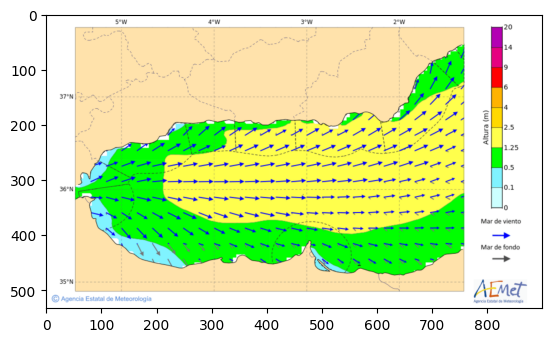

In [4]:
img = cv.imread('../img/aemet-yellow.png', cv.IMREAD_COLOR)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [5]:
picker = widgets.ColorPicker(
    concise=True
)
display(picker)

ColorPicker(value='black', concise=True)

In [6]:
# colors = [ c * 255 for c in to_rgb(picker.value)]
# hsv_colors = rgb_to_hsv(colors)

print(to_rgb(picker.value))
hsv_colors = rgb_to_hsv(to_rgb(picker.value))


def create_hsv_bounds(hsv, h_delta=10, s_delta=50, v_delta=50):
    h, s, v = hsv[0, 0].astype(np.int16) # unpacking the array. remember it's triple nested
    # converted into uint16 to avoid overflow

    lower_bound = np.array([max(h - h_delta,0), max(s - s_delta,0), max(v - v_delta,0)]).astype(np.uint8)
    upper_bound = np.array([min(h + h_delta,179), min(s + s_delta,255), min(v + v_delta,255)]).astype(np.uint8)
    return lower_bound, upper_bound

(0.0, 0.0, 0.0)


NameError: name 'rgb_to_hsv' is not defined

In [197]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_,thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)
slider = widgets.IntSlider(max=255, min=0, value=100) 

output = widgets.Output()

display(slider, output)

def threshold_image(thresh):
    _, thresh = cv.threshold(gray, thresh.new, 255, cv.THRESH_BINARY)
    with output:
        output.clear_output(wait=True)
        plt.imshow(thresh, cmap='gray')
        plt.axis('off')
        plt.show()
    
slider.observe(threshold_image, names='value')

with output:
    plt.imshow(thresh, cmap='gray')
    plt.axis('off')
    plt.show()

IntSlider(value=100, max=255)

Output()

ColorPicker(value='black')

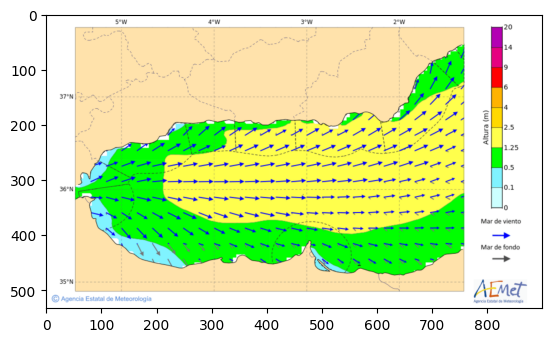

In [101]:
img = cv.imread('../img/aemet-yellow.png', cv.IMREAD_COLOR)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  
picker = widgets.ColorPicker()
display(picker) 

[[[ 20  85 246]]]


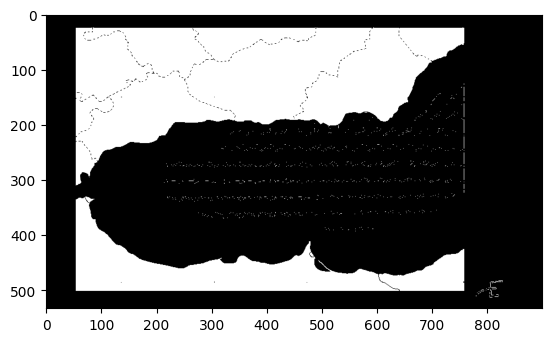

In [110]:
 
def create_hsv_bounds(hsv, h_delta=10, s_delta=50, v_delta=50):
    h, s, v = hsv[0, 0].astype(np.int16) # unpacking the array. remember it's triple nested
    # converted into uint16 to avoid overflow
    lower_bound = np.array([max(h - h_delta,0), max(s - s_delta,0), max(v - v_delta,0)]).astype(np.uint8)
    upper_bound = np.array([min(h + h_delta,179), min(s + s_delta,255), min(v + v_delta,255)]).astype(np.uint8)
    return lower_bound, upper_bound

def rgb_to_hsv(rgb: list) -> np.ndarray:
    source = np.array(rgb, dtype=np.uint8).reshape(1, 1, 3)
    return cv.cvtColor(source, cv.COLOR_RGB2HSV)

def color_mask(img, color_bounds: tuple[ np.ndarray, np.ndarray]) -> np.ndarray:
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    return cv.inRange(hsv_img, color_bounds[0], color_bounds[1])

color = to_rgb(picker.value)
rgb = [c * 255 for c in color]
hsv = rgb_to_hsv(rgb)
print(hsv)
lower_bound, upper_bound = create_hsv_bounds(hsv)
lower_bound, upper_bound

mask = color_mask(img, (lower_bound, upper_bound))
plt.imshow(mask, cmap='gray')

In [8]:
rgb = [100,0,100]

r_slider = widgets.IntSlider(min=0, max=255, value=rgb[0])
g_slider = widgets.IntSlider(min=0, max=255, value=rgb[1])
b_slider = widgets.IntSlider(min=0, max=255, value=rgb[2])

output = widgets.Output()

fig, ax = plt.subplots()

def update_color(change=None):
    rgb = [r_slider.value, g_slider.value, b_slider.value]
    color_square = np.ones((10, 10, 3), dtype=np.uint8) * rgb
    with output:
        output.clear_output(wait=True)

        plt.imshow(color_square)
        plt.axis('off')
        plt.show()
        

r_slider.observe(update_color, names='value')
g_slider.observe(update_color, names='value')
b_slider.observe(update_color, names='value')


display(r_slider, g_slider, b_slider, output)

update_color()



IntSlider(value=100, max=255)

IntSlider(value=0, max=255)

IntSlider(value=100, max=255)

Output()